In [1]:
# Step 1: Import packages, functions, and classes
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [2]:
# Step 2: Data Processing
from sklearn.model_selection import train_test_split
bankdata = pd.read_csv('COMP0050_CourseworkData\Bank_Portfolios.csv', header = None)
bankdata.columns = ['Loans for construction and land development', 'Loans secured by farmland', 'Loans secured by 1-4 family residential properties', 'Loans secured by multi-family ( > 5) residential properties', 'Loans secured by non-farm non-residential properties', 'Agricultural loans', 'Commercial and industrial loans', 'Loans to individuals', 'All other loans (excluding consumer loans', 'Obligations (other than securities and leases) of states and Political subdivision in the U.S.', 'Held-to-maturity securities', 'Available-for-sale securities, total', 'Premises and fixed assets including capitalized lease', 'Cash', 'Debt', 'default']
x = bankdata.iloc[:,0:15]
y = bankdata.iloc[:,15]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4, stratify = y) #

#### Decision Trees

report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2243
           1       0.22      0.26      0.24        92

    accuracy                           0.93      2335
   macro avg       0.60      0.61      0.60      2335
weighted avg       0.94      0.93      0.94      2335

The accuracy in the train set is = 1.000000
The accuracy in the test set is = 0.934904
Training Set Evaluation F1-Score =  1.0
Testing Set Evaluation F1-Score =  0.24


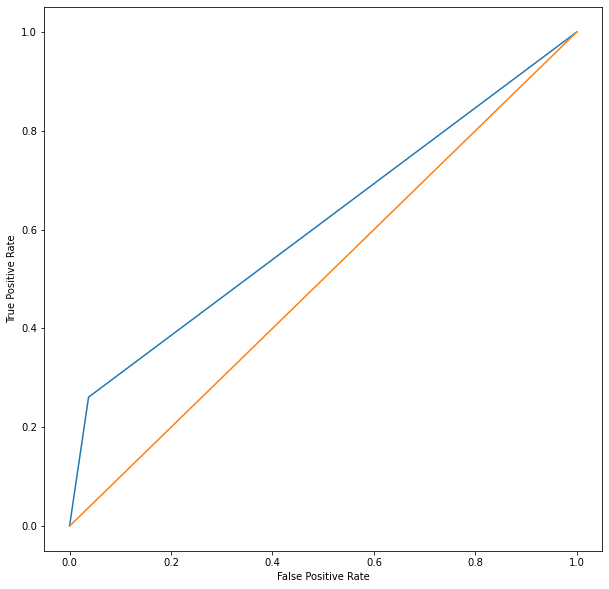

AUC: 0.6117098606292038
The optimal threshold of ROC: 1.0


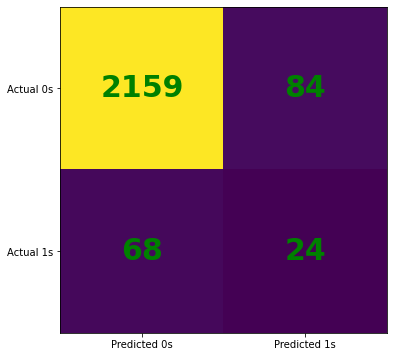

In [3]:
# Step 3: Create a model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 4)
dt.fit(x_train, y_train)

# Step 4: Evaluate the model
dt_p_pred_train = dt.predict_proba(x_train)
dt_p_pred_test = dt.predict_proba(x_test)
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)
dt_score_train = dt.score(x_train, y_train)
dt_score_test = dt.score(x_test, y_test)

# Step 5: Performance Indicators
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Precision, Recall, F1 Score
report = classification_report(y_test, dt_pred_test)
print('report:', report, sep = '\n')
print('The accuracy in the train set is = %f'%dt_score_train)
print('The accuracy in the test set is = %f'%dt_score_test)
print('Training Set Evaluation F1-Score = ', f1_score(y_train, dt_pred_train))
print('Testing Set Evaluation F1-Score = ', f1_score(y_test, dt_pred_test))

# ROC Curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_p_pred_test[:, 1])
plt.plot(dt_fpr, dt_tpr)
plt.plot(ns_fpr, ns_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# AUC
dt_auc = roc_auc_score(y_test, dt_p_pred_test[:, 1])
print('AUC:', dt_auc)
optimal_idx = np.argmax(dt_tpr - dt_fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimal threshold of ROC:', optimal_threshold)

# Confusion Matrix
conf_m = confusion_matrix(y_test, dt_pred_test)
fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha = 'center', va = 'center', color = 'green', fontsize = 30, fontweight = 'bold')
plt.show()

#### Random Forest, criterion = 'entropy'

report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2243
           1       1.00      0.03      0.06        92

    accuracy                           0.96      2335
   macro avg       0.98      0.52      0.52      2335
weighted avg       0.96      0.96      0.94      2335

The accuracy in the train set is = 0.999816
The accuracy in the test set is = 0.961884
Training Set Evaluation F1-Score =  0.9976580796252927
Testing Set Evaluation F1-Score =  0.06315789473684211


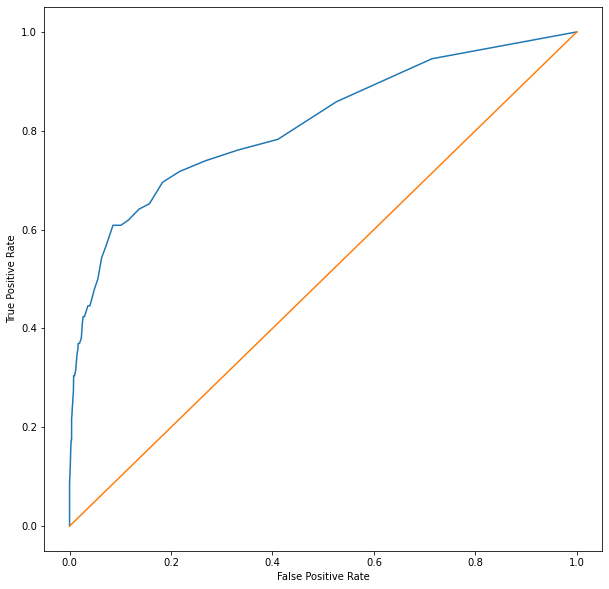

AUC: 0.8128743530597609
The optimal threshold of ROC: 0.12


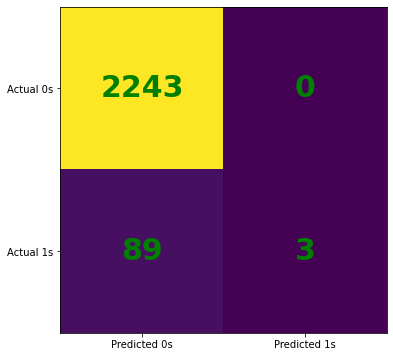

In [4]:
# Step 3: Create a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Step 4: Evaluate the model
rf_p_pred_train = rf.predict_proba(x_train)
rf_p_pred_test = rf.predict_proba(x_test)
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)
rf_score_train = rf.score(x_train, y_train)
rf_score_test = rf.score(x_test, y_test)

# Step 5: Performance Indicators
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Precision, Recall, F1 Score
report = classification_report(y_test, rf_pred_test)
print('report:', report, sep = '\n')
print('The accuracy in the train set is = %f'%rf_score_train)
print('The accuracy in the test set is = %f'%rf_score_test)
print('Training Set Evaluation F1-Score = ', f1_score(y_train, rf_pred_train))
print('Testing Set Evaluation F1-Score = ', f1_score(y_test, rf_pred_test))

# ROC Curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_p_pred_test[:, 1])
plt.plot(rf_fpr, rf_tpr)
plt.plot(ns_fpr, ns_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# AUC
rf_auc = roc_auc_score(y_test, rf_p_pred_test[:, 1])
print('AUC:', rf_auc)
optimal_idx = np.argmax(rf_tpr - rf_fpr)
optimal_threshold = thresholds[optimal_idx]
print('The optimal threshold of ROC:', optimal_threshold)

# Confusion Matrix
conf_m = confusion_matrix(y_test, rf_pred_test)
fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha = 'center', va = 'center', color = 'green', fontsize = 30, fontweight = 'bold')
plt.show()


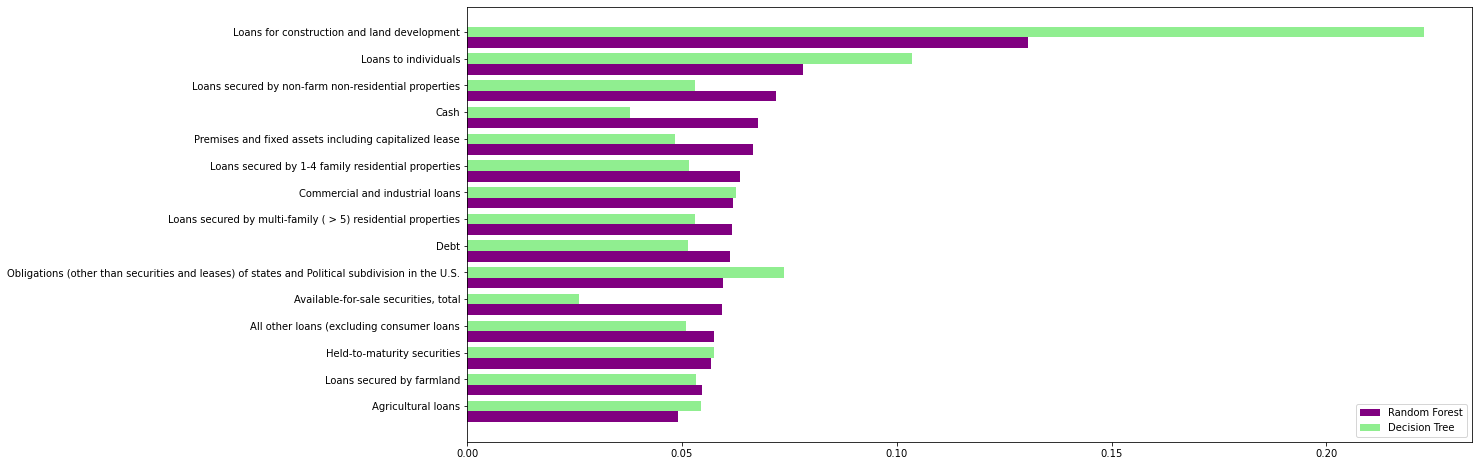

In [5]:
# Feature Importances
feature_importance = pd.DataFrame({
    'rf':rf.feature_importances_,
    'dt':dt.feature_importances_
}, index = x.columns)
feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

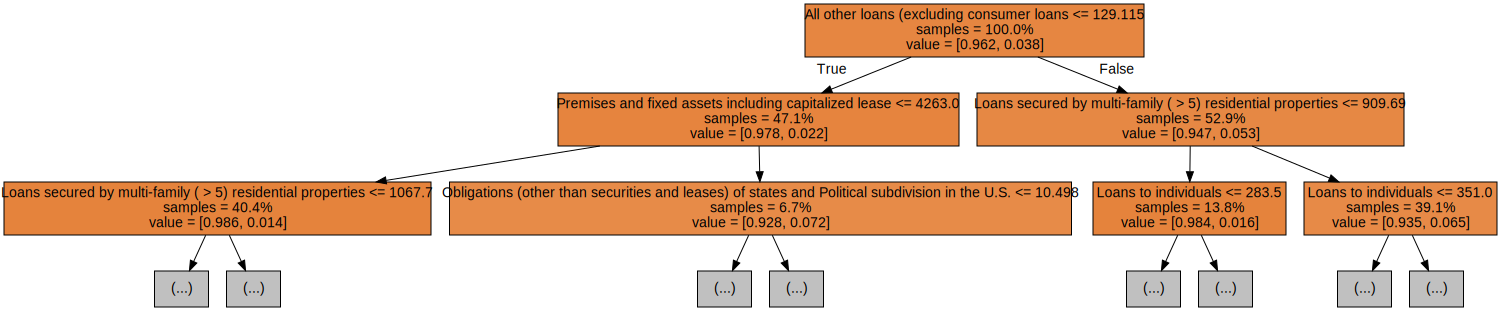

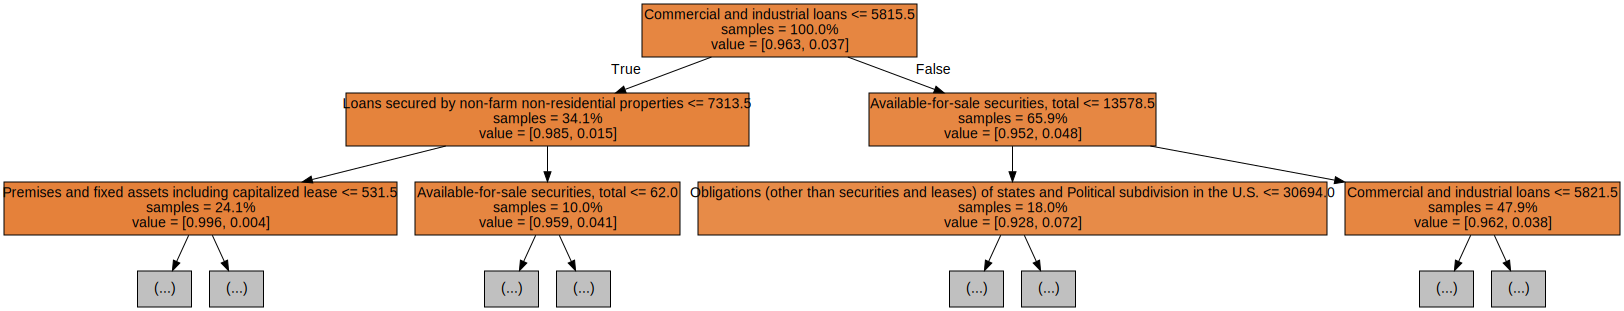

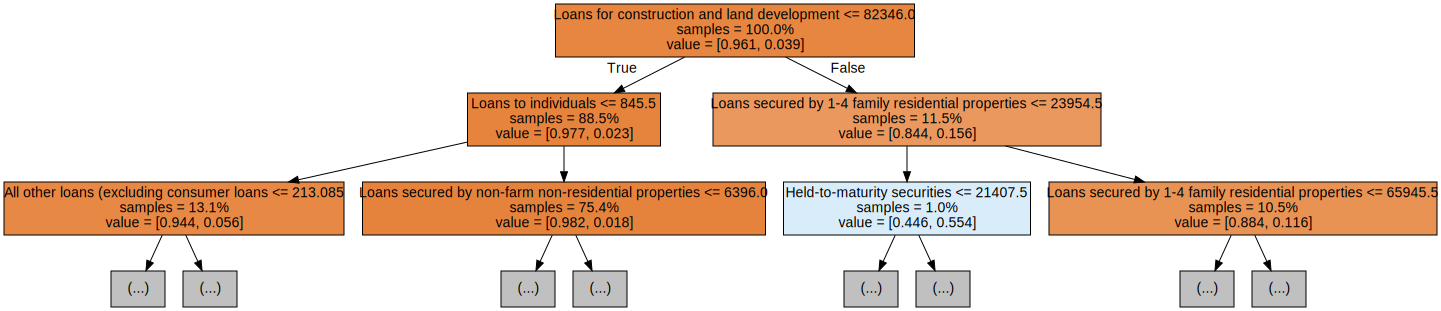

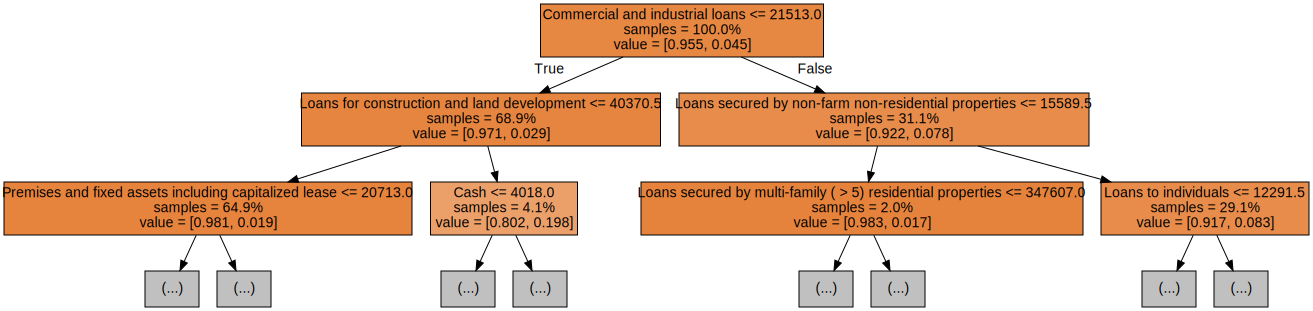

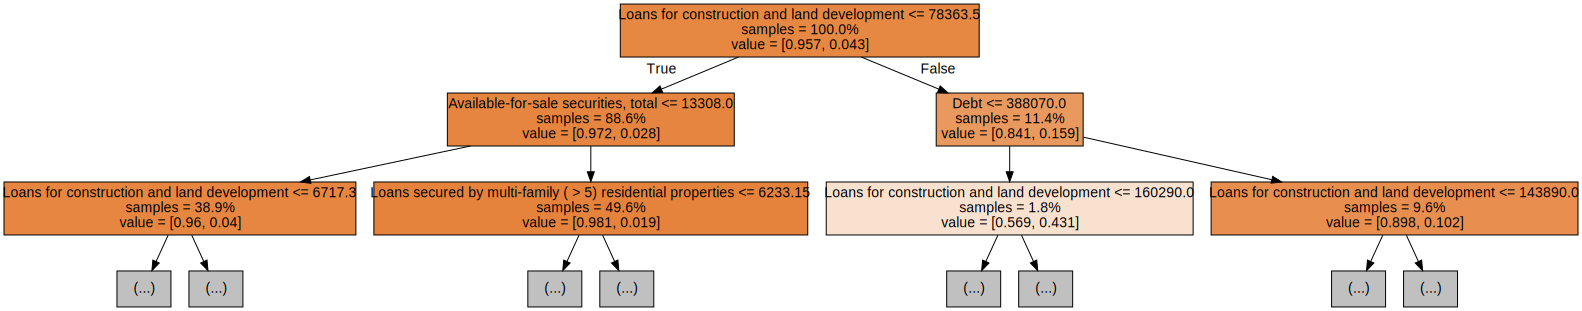

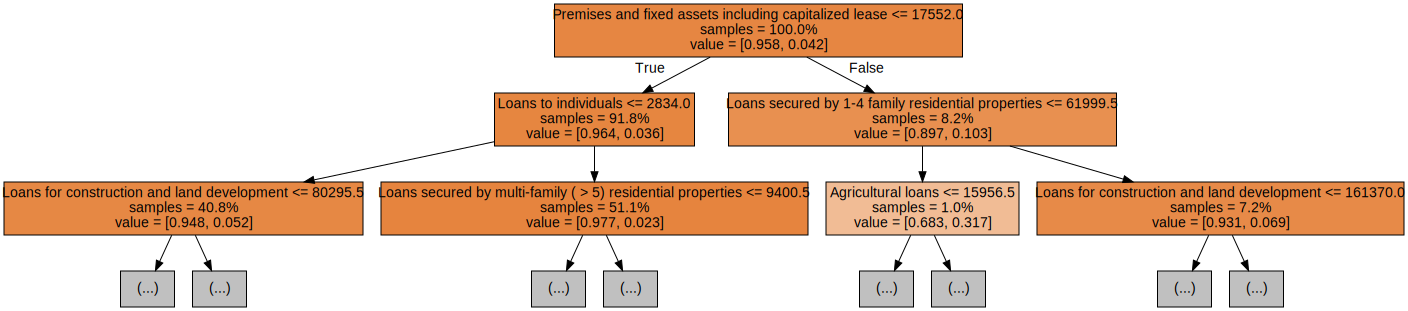

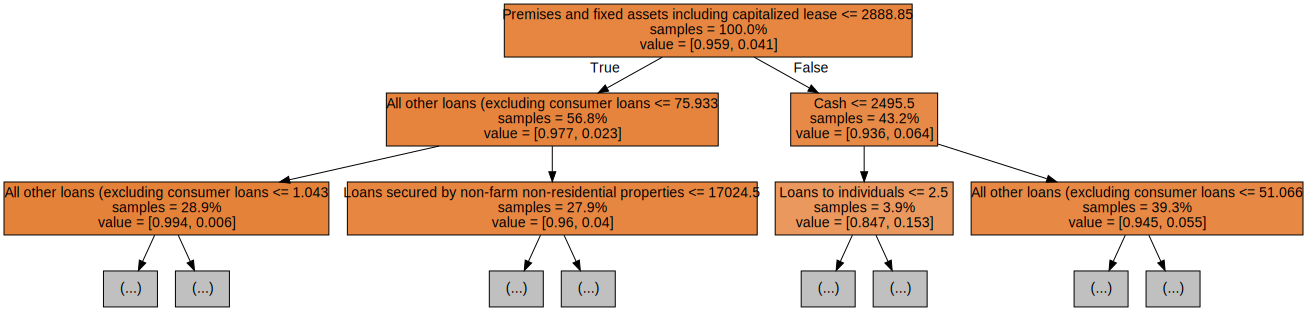

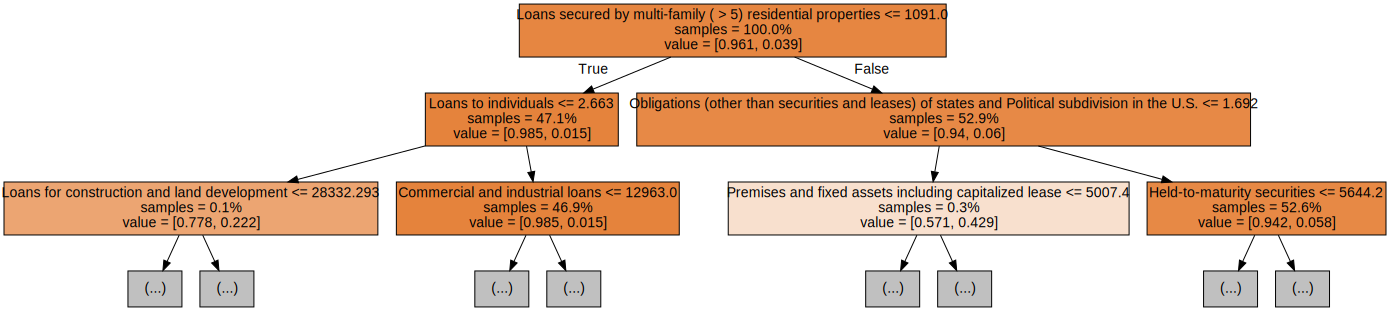

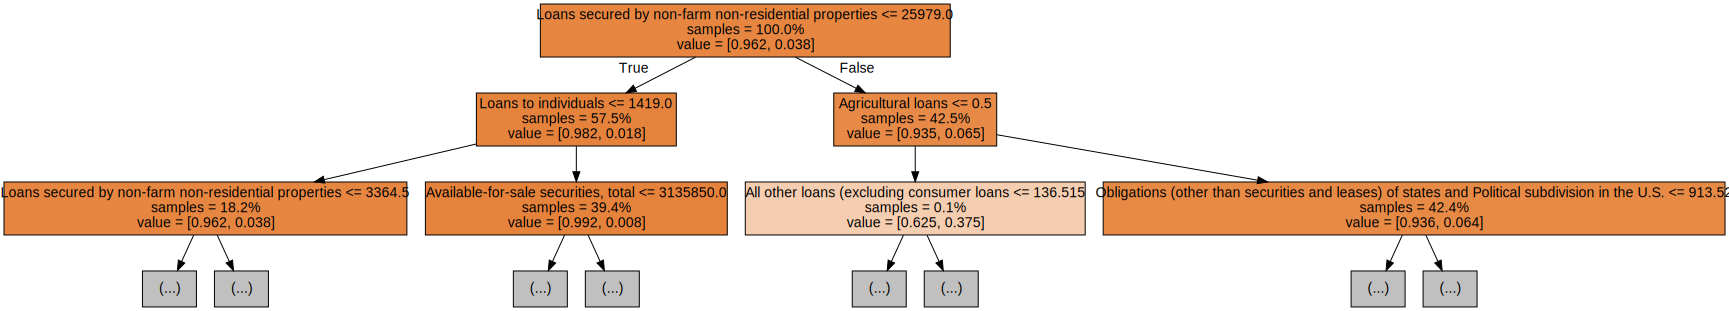

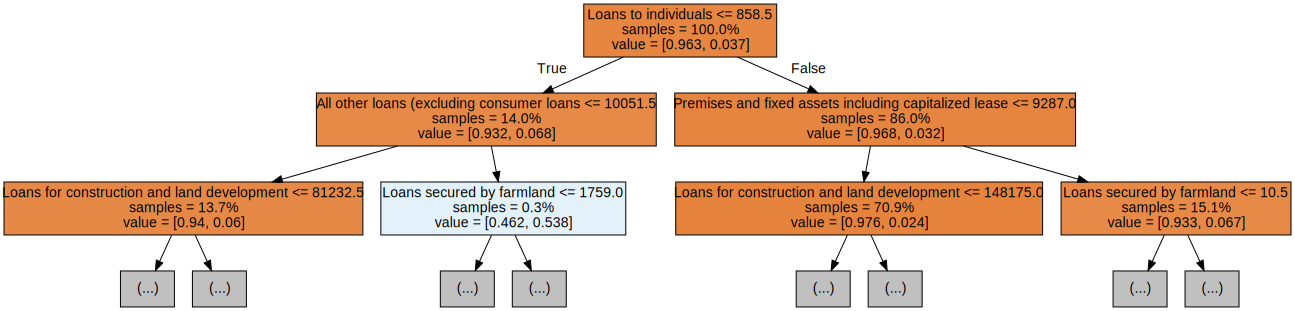

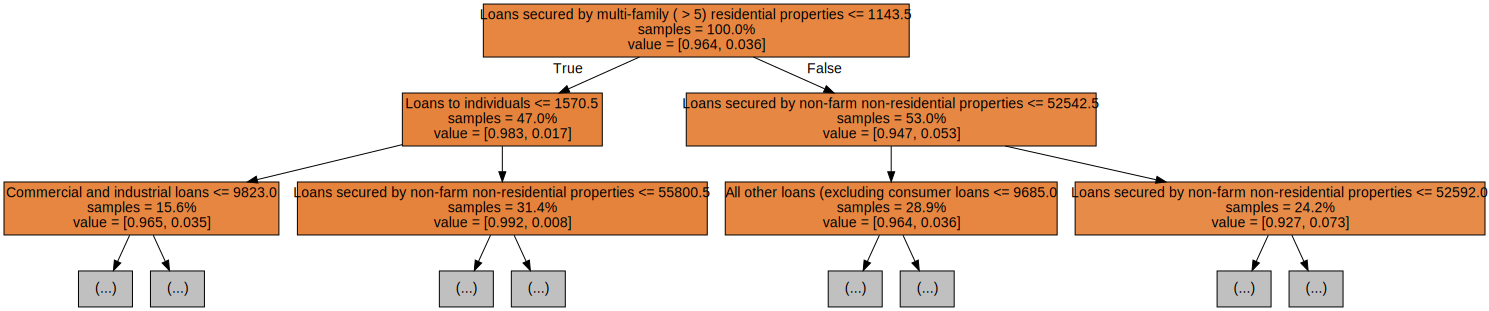

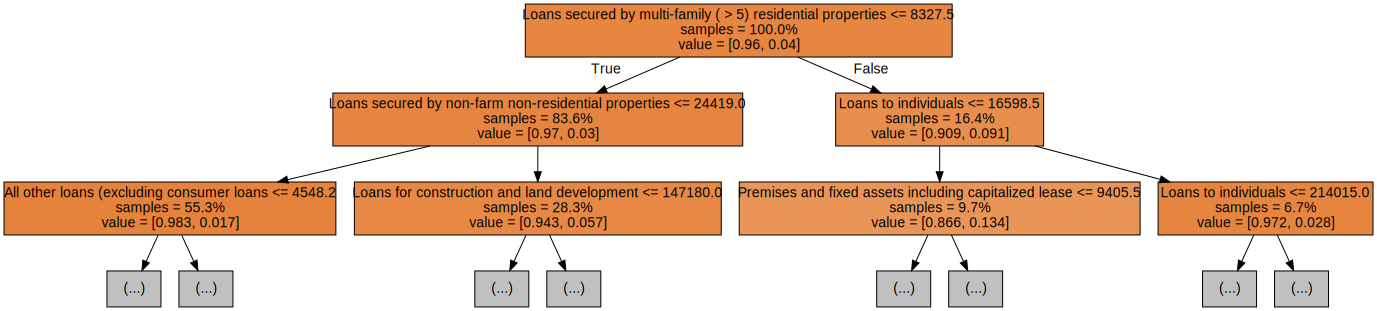

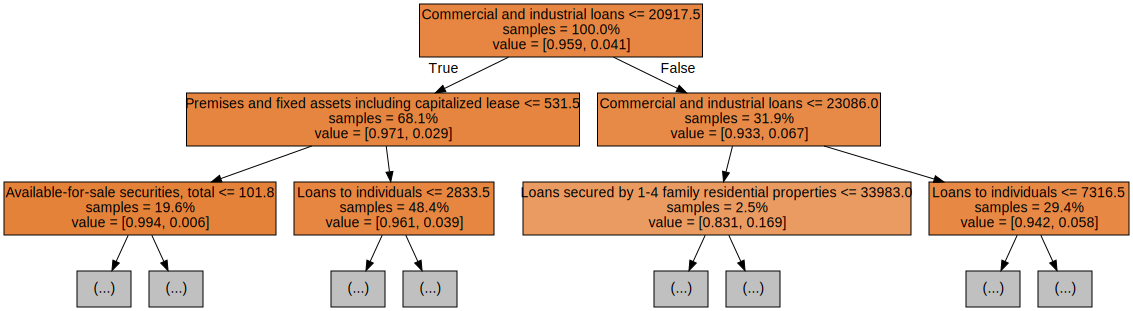

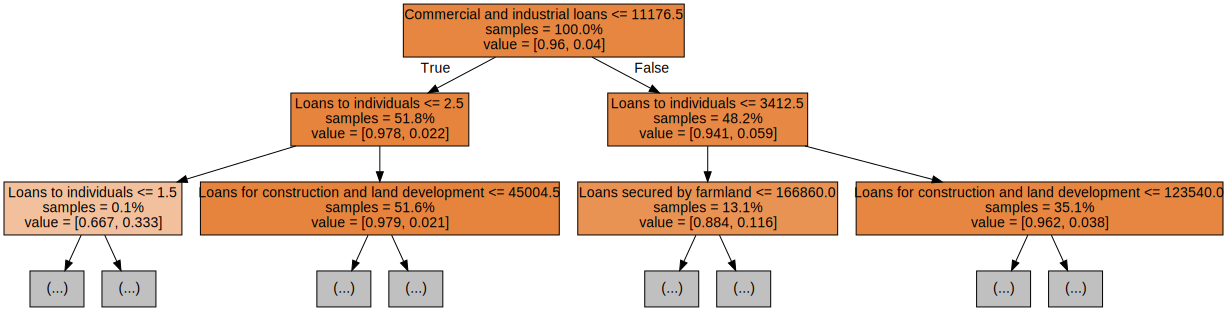

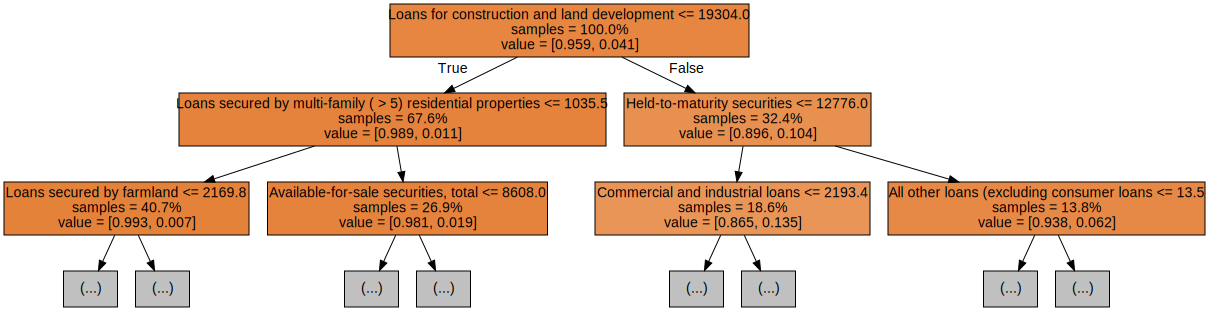

In [6]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(15):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names = x_train.columns, filled = True, max_depth = 2, impurity = False, proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)


#### Random Forests: RandomizedSearchCV

In [7]:
# Forests
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter = 5, cv = 5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205F534E0A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205F5397D60>})

Best hyperparameters: {'max_depth': 4, 'n_estimators': 361}


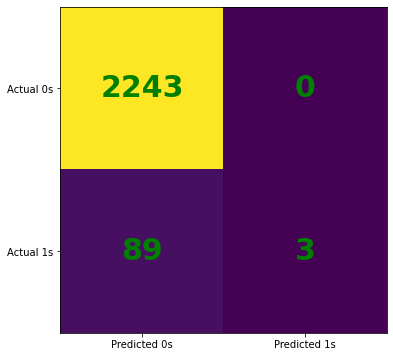

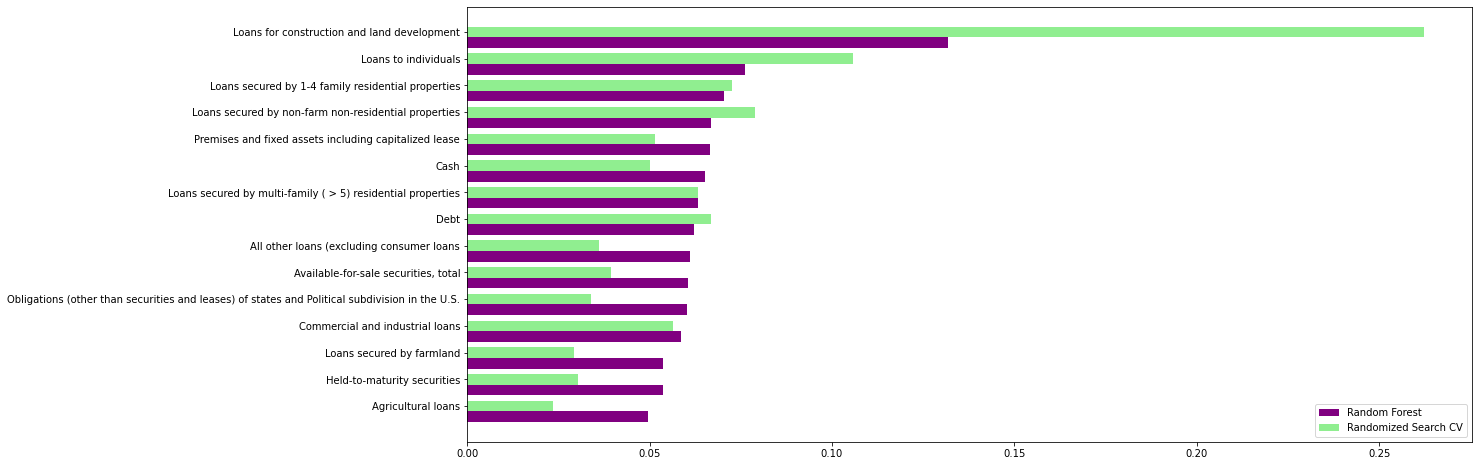

In [8]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# Confusion Matrix
conf_m = confusion_matrix(y_test, rf_pred_test)
fig, ax = plt.subplots(figsize = (6, 6))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha = 'center', va = 'center', color = 'green', fontsize = 30, fontweight = 'bold')
plt.show()

# Feature Importances
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

feature_importance = pd.DataFrame({
    'rf':rf.feature_importances_,
    'best_rf':best_rf.feature_importances_
}, index = x.columns)
feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf'],0.4,color='purple',label='Random Forest')
best_rf_feature=ax.barh(index+0.4,feature_importance['best_rf'],0.4,color='lightgreen',label='Randomized Search CV')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()